## Pymaceuticals, Inc.

#### Analysis

* The distribution of female and male mice in this study (49% and 51%, respectively), was almost equal, meaning the sex of the mice might not be a significant variable to the study. 

* The box plot shows that across the four regimens selected (Capomulin, Ramicane, Infubinol and Ceftamin), Capomulin and Ramicane tend to have smaller final tumor volumes than the other treatment regimens. Ramicane appears to have a lower final tumor volume of the four, however the number of mice treated by Ramicane is slightly less that Capomulin (see Bar Charts). To get a more accurate conclusion, the treatment of both regimens may need to be continued on the same number of mice. 

* For the Capomulin treatment group, there is a strong positive correlation (0.84) between mouse weight and average tumor volume. This showed that the heavier the mouse, the bigger the tumor volume. The r-squared was 0.71, so we could infer that the final tumor volume could be predicted based on the average weight of a mouse. 

* When looking at the Capomulin treatment for mouse 'g316', the tumor volume peaked at day 25 before decreasing in size suddenly between days 40 and 45. The highest timepoint (number of days) in this study was 45, so continuing the length of the treatment for mice on Capomulin may show a continued decrease in tumor volume. 

In [117]:
#Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


###### Load and view data

In [118]:
#csv data files to load
mouse_metadata_file = "data/Mouse_metadata.csv"
study_results_file = "data/Study_results.csv"

#Read the mouse data and study results
mouse_metadata = pd.read_csv(mouse_metadata_file)
study_results = pd.read_csv(study_results_file)



In [119]:
#View mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [120]:
#View study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


###### Prepare the data

In [121]:
#Merge data files together into a single data set on the common column "Mouse ID"
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [122]:
#Find the number of unique mice in the data set by using unique
mouse = mouse_study_df["Mouse ID"].unique()
len(mouse)

249

In [123]:
#Find the number of mice in the data set by using value_counts
mice = mouse_study_df["Mouse ID"].value_counts()
len(mice)

249

In [124]:
#Check for any mouse ID with duplicate time points
duplicates = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [125]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_df2 = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"]!= "g989"]
clean_mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [127]:
# Checking the number of mice in the clean DataFrame
len(clean_mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

###### Generate summary statistics

#### Part 1
###### Use groupby and summary statistical methods to calculate mean, median, variance, standard deviation, and SEM of the tumor volume. Assemble the results into a single summary data frame

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_study_df["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [171]:
#Create a grouped dataframe by Drug Regimen
tumor_regimen_stats = clean_mouse_study_df.groupby("Drug Regimen")



In [130]:
#Find the mean for each drug regimen
mean = tumor_regimen_stats['Tumor Volume (mm3)'].mean()

#Find the median for each drug regimen
median = tumor_regimen_stats['Tumor Volume (mm3)'].median()

#Find the variance for each drug regimen
variance = tumor_regimen_stats['Tumor Volume (mm3)'].var()

#Find the standard deviation for each drug regimen
std = tumor_regimen_stats['Tumor Volume (mm3)'].std()

#Find the standard error of mean
sem = tumor_regimen_stats['Tumor Volume (mm3)'].sem()

#Combine all stats together into a dataframe to display results
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume" : mean, 
    "Median Tumor Volume" : median, 
    "Tumor Volume Variance" : variance, 
    "Tumor Volume Std. Dev." : std, 
    "Tumor Volume Std. Err.": sem})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#### Part 2
###### Use the aggregation method to find the mean, median, variance, standard deviation and SEM of the tumor volume in a single line

In [131]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_table = tumor_regimen_stats['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

###### Create bar charts and pie charts

#### Bar Chart 1
###### Create a bar chart showing the total number of timepoints for all mice tested for each drug regimen using Pandas DataFram.plot()

In [132]:
#Use the dataframe that has already grouped the columns by drug regimen
bar_chart_1 = tumor_regimen_stats["Mouse ID"].count().sort_values(ascending=False)
bar_chart_1


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Mouse ID, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

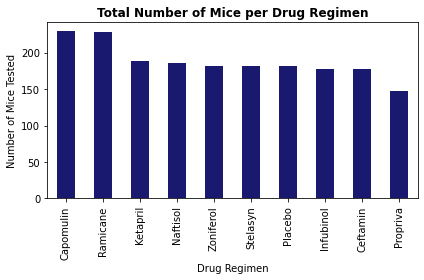

In [133]:
#Generate a bar chart showing the total number of mice for each treatment
pandas_bar_chart = bar_chart_1.plot(kind='bar', width=0.5, color='midnightblue')
#Set x/y labels, title
pandas_bar_chart.set_title(label="Total Number of Mice per Drug Regimen", fontweight='bold')
pandas_bar_chart.set_xlabel("Drug Regimen")
pandas_bar_chart.set_ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show





#### Bar Chart 2

###### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Matplotlib's pyplot

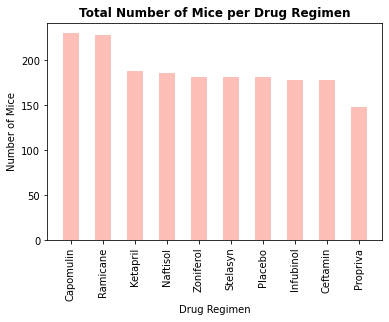

In [138]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Set x axis
x_axis = np.arange(len(bar_chart_1))
regimen_name = list(bar_chart_1.index.values)

#Create bar chart
mpl_bar_chart = plt.bar(x_axis, bar_chart_1, color="salmon", alpha=0.5, width=0.5)

#Set x/y label, title
plt.xticks(x_axis, regimen_name, rotation= "vertical")
plt.title("Total Number of Mice per Drug Regimen", fontweight="bold")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout

plt.show()

#### Pie Chart 1

###### Generate a pie chart showing the distribution of female versus male mice in the study using Pandas dataframe.plot()

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_of_mice = clean_mouse_study_df.groupby('Sex')['Sex'].count()
sex_of_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

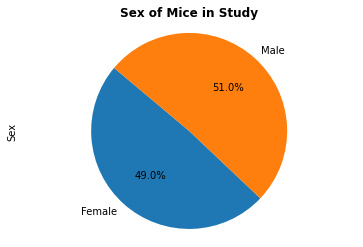

In [142]:
#Generate pie chart
pandas_pie = sex_of_mice.plot(kind="pie", startangle = 140, autopct= '%1.1f%%')

#Create axes which are equal so there is a perfect circle
plt.axis("equal")

#Set x/y label and title
pandas_pie.set_title(label="Sex of Mice in Study", fontweight= "bold")
pandas_pie.set_ylabel('Sex')

plt.tight_layout
plt.show()


#### Pie Chart 2

###### Generate a pie chart showing the distribution of female versus male mice in the study using Matplotlib's pyplot 

<function matplotlib.pyplot.show(*args, **kw)>

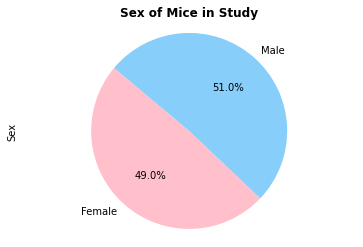

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Set x_axis and colors
sex = sex_of_mice.index
colors = ["pink", "lightskyblue"]

#Create pie chart
mpl_pie = plt.pie(sex_of_mice, labels= sex_of_mice.index, colors=colors, autopct="%1.1f%%", startangle=140)

#Create axis that are equal so there is a perfect circle
plt.axis("equal")

#Set x/y label and title
plt.title("Sex of Mice in Study", fontweight = "bold")
plt.ylabel('Sex')

plt.tight_layout

plt.show


## Quartiles, Outliers and Boxplots

###### Calculate quartiles, find outliers and create a box plot

In [186]:
# Focus only on four regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse
final_tumor_vol = clean_mouse_study_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()
final_tumor_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [187]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin

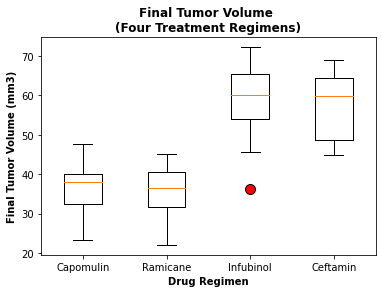

In [176]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight = "bold")
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight = "bold")

# Present the box plot chart
plt.show()


## Line and Scatter Plots

###### Create a line plot and a scatter plot

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [179]:
#Select mouse 'g316' for line plot
mouse_g316 = "g316"
g316_tumor = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_g316]
g316_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1815,g316,0,45.000000,0,Capomulin,Female,22,22
1816,g316,5,44.022752,0,Capomulin,Female,22,22
1817,g316,10,44.502042,0,Capomulin,Female,22,22
1818,g316,15,45.216743,0,Capomulin,Female,22,22
1819,g316,20,45.933322,1,Capomulin,Female,22,22
1820,g316,25,46.809225,1,Capomulin,Female,22,22
1821,g316,30,44.221480,2,Capomulin,Female,22,22
1822,g316,35,44.702833,2,Capomulin,Female,22,22
1823,g316,40,45.565821,2,Capomulin,Female,22,22
1824,g316,45,40.159220,2,Capomulin,Female,22,22


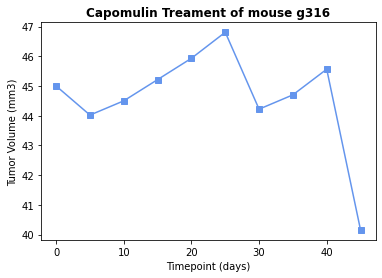

In [181]:
#Generate line plot
plt.plot(g316_tumor["Timepoint"], g316_tumor["Tumor Volume (mm3)"], color= 'cornflowerblue', marker = 's')
plt.title("Capomulin Treament of mouse g316", fontweight = "bold")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


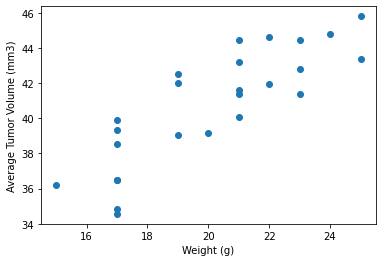

In [168]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_mice["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_mice["Weight (g)"].unique()

plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

###### Calculate correlation and regression

The correlation between mouse weight and the average tumor volume is 0.84.
The r-squared value is: 0.71


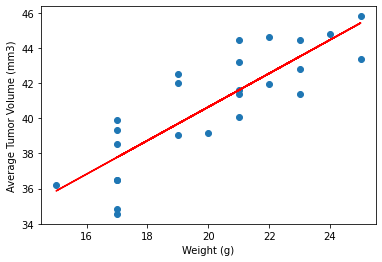

In [185]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = round(rvalue **2, 2)
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
print(f"The r-squared value is: {r_squared}")
plt.show()
